In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay,
                             PrecisionRecallDisplay, classification_report)

df = pd.read_csv("diabetes.csv")
y = df["Outcome"]         # columna objetivo (0/1)
X = df.drop(columns=["Outcome"])
y,X


(0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

tree = DecisionTreeClassifier(
    criterion="gini",    # "entropy" o "log_loss" también
    max_depth=4,         # ajusta para controlar complejidad
    random_state=42
).fit(X_train, y_train)

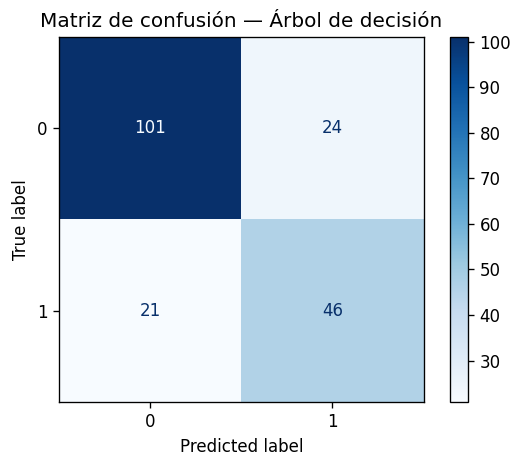

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       125
           1       0.66      0.69      0.67        67

    accuracy                           0.77       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.77      0.77       192



In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, ax=ax, cmap="Blues")
ax.set_title("Matriz de confusión — Árbol de decisión")
plt.tight_layout()
plt.show()

print(classification_report(y_test, tree.predict(X_test)))

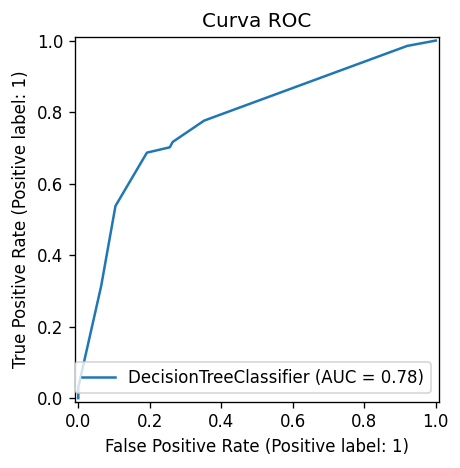

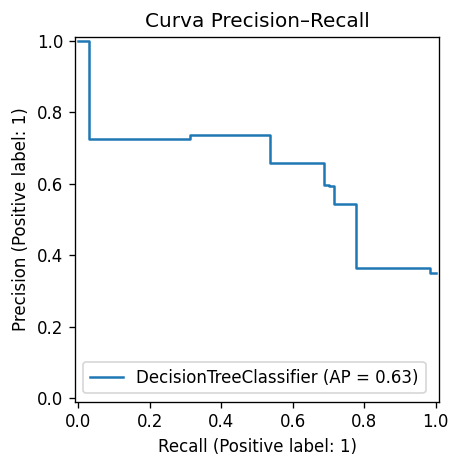

In [ ]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax)
ax.set_title("Curva ROC")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(5,4), dpi=120)
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
ax.set_title("Curva Precision–Recall")
plt.tight_layout()
plt.show()

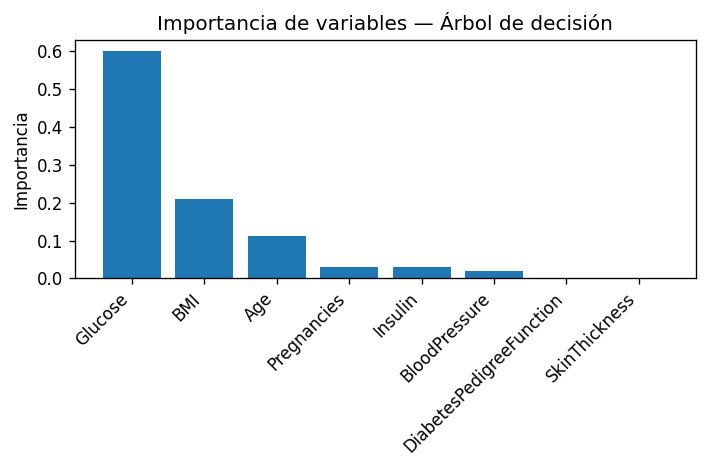

In [ ]:
importances = tree.feature_importances_
feat_names = np.array(X.columns)

order = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.bar(range(len(importances)), importances[order])
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feat_names[order], rotation=45, ha="right")
ax.set_ylabel("Importancia")
ax.set_title("Importancia de variables — Árbol de decisión")
plt.tight_layout()
plt.show()

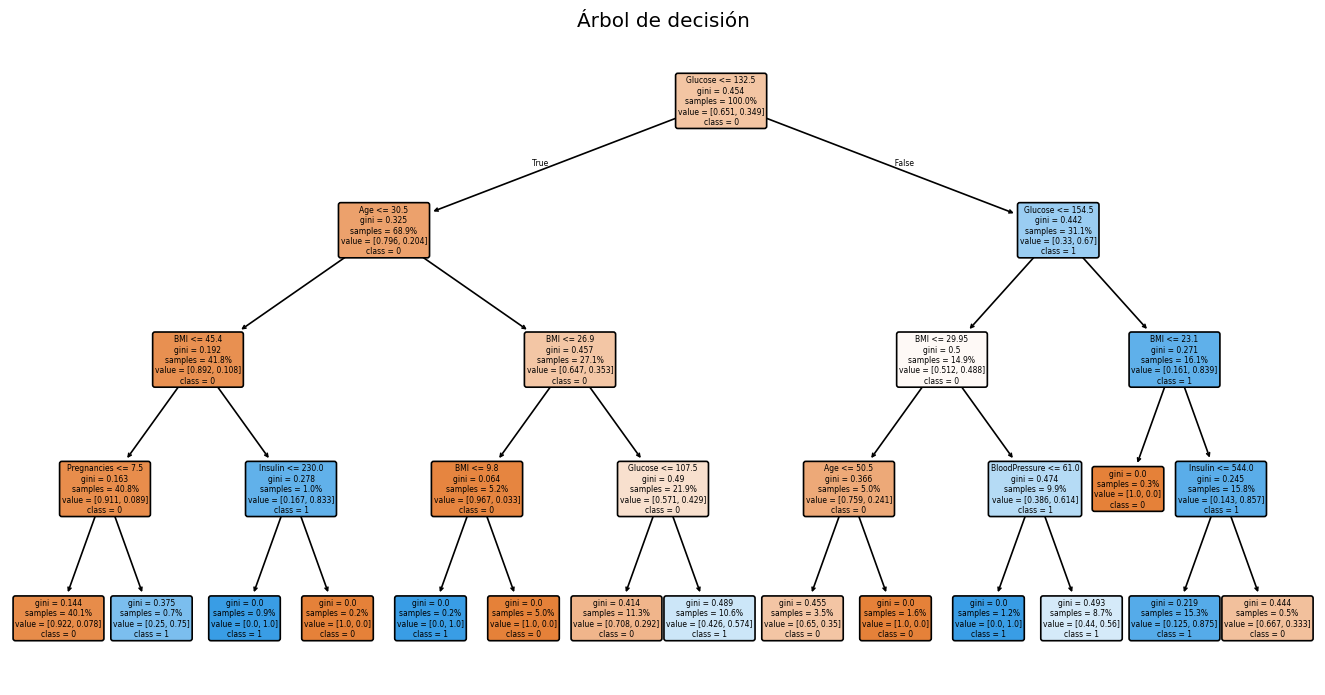

In [ ]:
from sklearn import tree as sktree
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

sktree.plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    impurity=True,        # muestra gini/entropy/log_loss del nodo
    proportion=True       # distribuciones normalizadas
)
ax.set_title("Árbol de decisión")
plt.show()

In [ ]:
# En Colab:
!apt-get -qq install graphviz
!pip -q install graphviz pydotplus

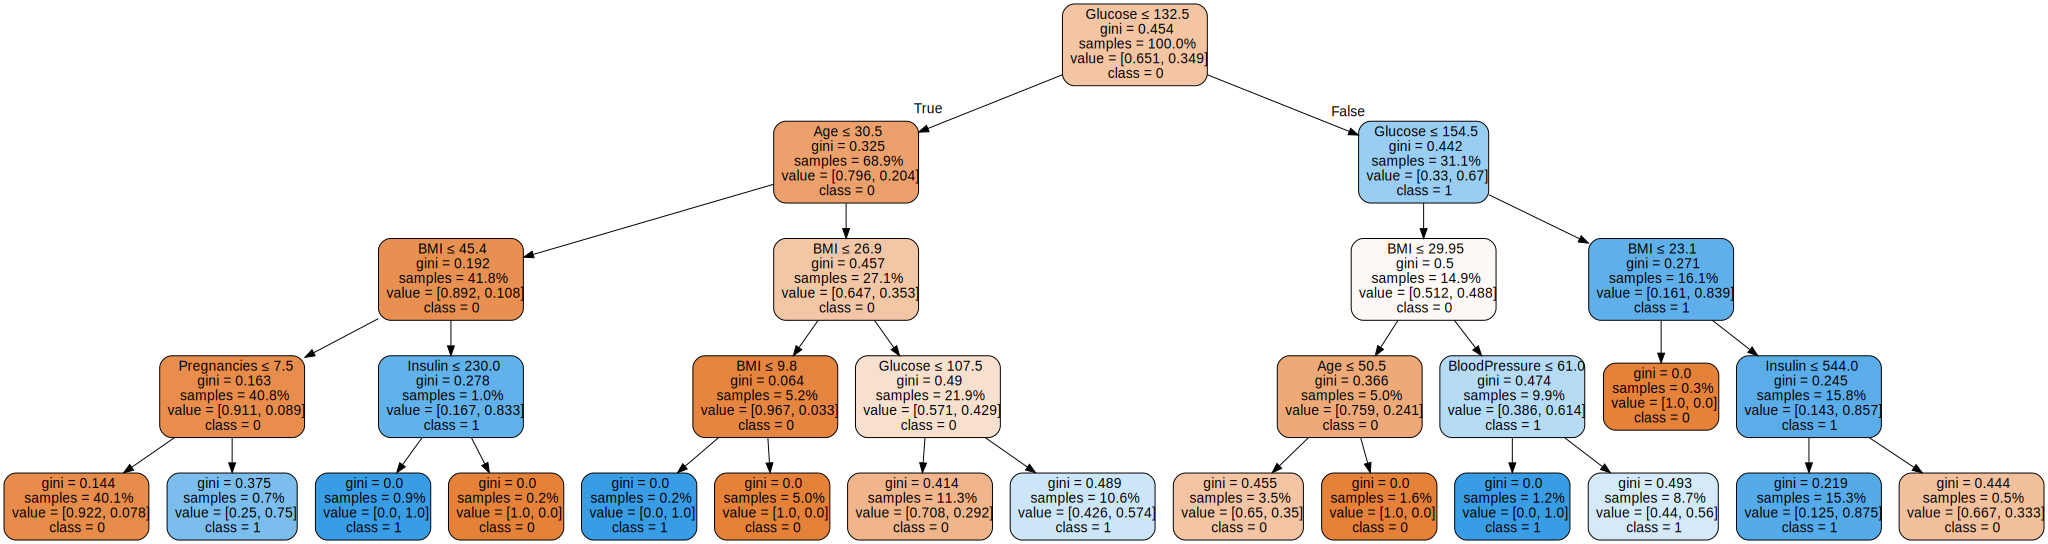

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=True,
    proportion=True
)
graph = graphviz.Source(dot)
graph.format = "png"          # "svg" también es buena opción
graph.render("arbol_decision", cleanup=True)
graph

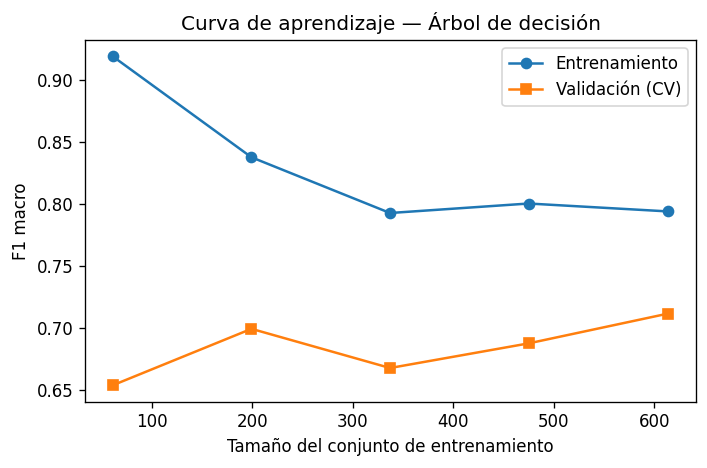

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
    X=X, y=y, cv=5, scoring="f1_macro", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.plot(train_sizes, train_mean, marker="o", label="Entrenamiento")
ax.plot(train_sizes, valid_mean, marker="s", label="Validación (CV)")
ax.set_xlabel("Tamaño del conjunto de entrenamiento")
ax.set_ylabel("F1 macro")
ax.set_title("Curva de aprendizaje — Árbol de decisión")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
criterios = ["gini", "entropy", "log_loss"]
resultados = []

for c in criterios:
    clf = DecisionTreeClassifier(criterion=c, max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    resultados.append((c, acc))

pd.DataFrame(resultados, columns=["criterion", "accuracy"])

,criterion,accuracy
0,gini,0.765625
1,entropy,0.750000
2,log_loss,0.750000
